<a href="https://colab.research.google.com/github/MJKhadeeja/ML-python-Projects/blob/Random-Forest/Rf_(clss)heart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving heart (1).csv to heart (1).csv


{'heart (1).csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,

In [ ]:
heart_data=pd.read_csv('heart (1).csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

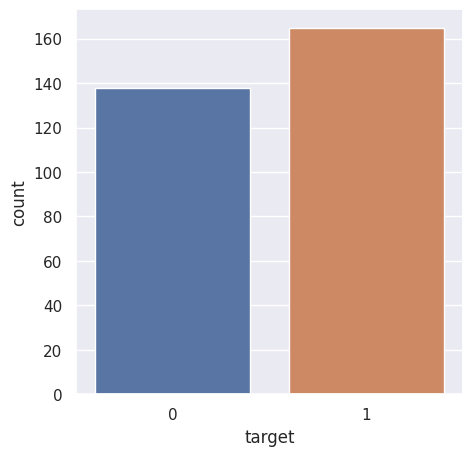

In [ ]:
sns.set()
plt.figure(figsize=(5,5))
sns.countplot(x='target',data=heart_data)


<Axes: xlabel='target', ylabel='chol'>

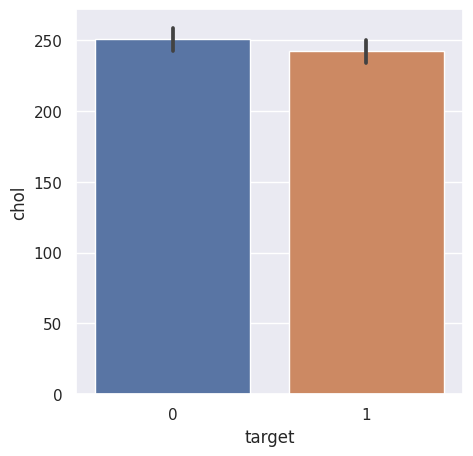

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='target',y='chol',data=heart_data)

<Axes: xlabel='target', ylabel='oldpeak'>

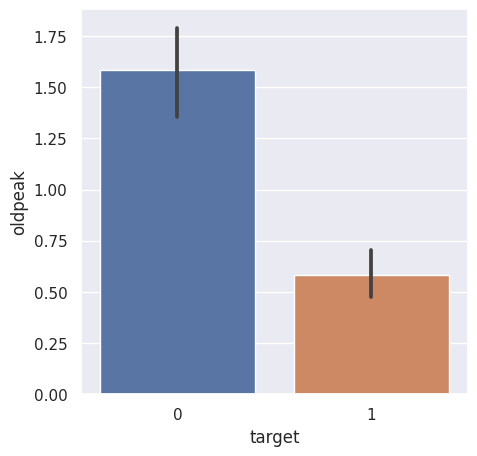

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='target',y='oldpeak',data=heart_data)

In [ ]:
correlation=heart_data.corr()

<Axes: >

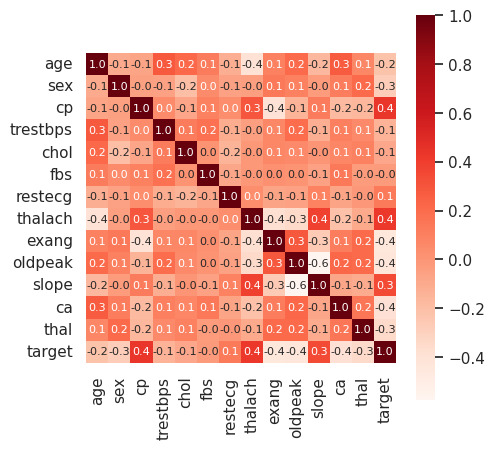

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [ ]:
x=heart_data.drop('target',axis=1)

In [ ]:
y=heart_data['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
293   67    1   2       152   212    0        0      150      0      0.8   
99    53    1   2       130   246    1        0      173      0      0.0   
271   61    1   3       134   234    0        1      145      0      2.6   
81    45    1   1       128   308    0        0      170      0      0.0   
257   50    1   0       144   200    0        0      126      1      0.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
196   46    1   2       150   231    0        1      147      0      3.6   
191   58    1   0       128   216    0        0      131      1      2.2   
275   52    1   0       125   212    0        1      168      0      1.0   
192   54    1   0       120   188    0        1      113      0      1.4   
161   55    0   1       132   342    0        1      166      0      1.2   

     slope  ca  thal  
293      1   0     3  
99       2   3     2  
271      1   2    

In [ ]:
print(x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
172   58    1   1       120   284    0        0      160      0      1.8   
261   52    1   0       112   230    0        1      160      0      0.0   
142   42    0   2       120   209    0        1      173      0      0.0   
114   55    1   1       130   262    0        1      155      0      0.0   
43    53    0   0       130   264    0        0      143      0      0.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   55    0   0       128   205    0        2      130      1      2.0   
291   58    1   0       114   318    0        2      140      0      4.4   
236   58    1   0       125   300    0        0      171      0      0.0   
141   43    1   0       115   303    0        1      181      0      1.2   
150   66    1   0       160   228    0        0      138      0      2.3   

     slope  ca  thal  
172      1   0     2  
261      2   1     2  
142      1   0    

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
x_train_prediction=model.predict(x_train)
train_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [ ]:
print('the accuracy of training data is',train_data_accuracy)

the accuracy of training data is 1.0


In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [ ]:
print('the test data accuracy is',test_data_accuracy)

the test data accuracy is 0.8032786885245902


In [ ]:
x_test.to_csv('heart_data.csv')
from google.colab import files
files.download('heart_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(71,0,1,160,302,0,1,162,0,0.4,2,2,2)
input_data_array=np.array(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction[0])

if(prediction[0]==0):
  print('the patient do not have heart disease')
else:
  print('the patient have heart disease')

1
the patient have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
